<a href="https://colab.research.google.com/github/robertchoi/BatteryDatasetImplementation/blob/master/%EB%B0%B0%ED%84%B0%EB%A6%AC%EA%B5%90%EC%B2%B4%EB%B6%80%EB%B6%84%EC%B0%BE%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from os import path
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/m2_s2_bank_0765f177a52e5543a9e0a8bfc045cf6a__site_40ab7c891c559b478e96f8bb5c682ca0 (1).csv', encoding='utf8')
df

,KeyTime,CellNo,ResistValue,VoltValue,TempValue
0,2020-02-12 02:16:28,1,0.000,4.45,22.9
1,2020-02-12 13:22:05,1,0.000,4.44,22.8
2,2020-02-12 13:22:05,2,0.423,4.47,-20.0
3,2020-02-12 13:22:05,3,0.426,4.46,-20.0
4,2020-02-12 13:22:05,4,0.392,4.44,-20.0
...,...,...,...,...,...
63028,2021-02-03 05:59:28,92,0.442,4.47,-20.0
63029,2021-02-03 05:59:28,93,0.434,4.49,-20.0
63030,2021-02-03 05:59:28,94,0.440,4.46,-20.0
63031,2021-02-03 05:59:28,95,0.437,4.43,-20.0


In [ ]:
df_cell_sort = df.sort_values(['CellNo', 'ResistValue'], ascending=True)
df_cell_sort

,KeyTime,CellNo,ResistValue,VoltValue,TempValue
0,2020-02-12 02:16:28,1,0.000,4.45,22.9
1,2020-02-12 13:22:05,1,0.000,4.44,22.8
97,2020-02-13 01:21:22,1,0.000,4.44,21.5
193,2020-02-13 13:20:44,1,0.000,4.45,20.7
289,2020-02-14 01:20:08,1,0.000,4.44,21.0
...,...,...,...,...,...
16658,2020-06-06 10:31:18,96,0.619,4.47,-20.0
17138,2020-06-08 22:28:56,96,0.619,4.46,-20.0
2229,2020-02-21 11:45:45,96,0.620,4.46,-20.0
19935,2020-06-25 04:55:22,96,0.620,4.47,-20.0


In [ ]:
cellcounts=len(df_cell_sort['CellNo'].unique())
cellcounts

96

In [ ]:

for i in range(1,cellcounts):
  df_cell = df[df['CellNo']==i]['ResistValue']
  df_cell_list = df_cell.to_list()
  df_len = len(df_cell)
  a = np.zeros(4)
  init_list = 0
  
  for j in range(1, df_len-1):
    if df_cell_list[j+1] < df_cell_list[j] - df_cell_list[j]*0.2 and df_cell_list[j-1] != 0 and df_cell_list[j+1] != 0:
      if (df_cell_list[j-2] + df_cell_list[j-1]) / 2 > (df_cell_list[j+1] + df_cell_list[j+2]) / 2:
        print("cellno", i)
        print(j-1, "번째", df_cell_list[j-1] ,", ",j+1,"번째", df_cell_list[j+1])
        print("여기부터 낮은 저항 = ", j)
        print("그 값은 = ", df_cell_list[j])
        

        a = np.insert(a, init_list,[j])
        init_list += 1
        # lengh = len(a)
        zero = 0
        init = int(a[0])
        # print(init)
        for l in range(init_list+1):
          f = open(str(i)+"_cell_"+ str(l) + ".csv", "w")
          for m in range(zero, init):
            print(df_cell_list[m])
            f.write(str(df_cell_list[m])+'\n')
          if init_list == 2 or init_list == 3:
            print("동작된다")
            l -= 1
            init_list =-1
            zero = init
            init = int(a[l+2])
            print("case1 zero, init = ", zero, " ", init)
          else:
            l -= 1
            zero = init
            print(df_len)
            init = df_len
            print("asdfasdfsdaf", init)
            print("case2  zero, init = ", zero, " ", init)
          
          f.close()






스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
0.429
0.429
0.428
0.43
0.428
0.429
0.428
0.428
0.43
0.431
0.43200000000000005
0.435
0.434
0.435
0.43799999999999994
0.439
0.44
0.441
0.441
0.43799999999999994
0.439
0.439
0.442
0.44299999999999995
0.442
0.44299999999999995
0.442
0.444
0.444
0.444
0.442
0.441
0.44299999999999995
0.444
0.44299999999999995
0.44
0.441
0.44
0.442
0.44299999999999995
0.441
0.444
0.442
0.44299999999999995
0.442
0.446
0.446
0.446
0.444
0.444
0.44299999999999995
0.441
0.44299999999999995
0.445
0.442
0.44299999999999995
0.44
0.441
0.442
0.444
0.44299999999999995
0.444
0.445
0.44299999999999995
0.44
0.441
0.43799999999999994
0.441
0.441
0.442
0.441
0.44
0.44
0.442
0.442
0.44
0.44299999999999995
0.444
0.44299999999999995
0.442
0.444
0.44299999999999995
0.44299999999999995
0.44299999999999995
0.44299999999999995
0.446
0.445
0.44799999999999995
0.446
0.44799999999999995
0.447
0.444
0.442
0.439
0.43700000000000006
0.43799999999999994
0.44
0.44299999999999995
0.445
0.437999999999999

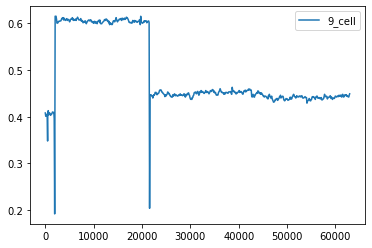

In [ ]:
plt.plot(df[df['CellNo']==9]['ResistValue'], label=str(9)+'_cell')
plt.legend()
plt.show()

In [ ]:
os.chdir("/content/drive/MyDrive/notebooks")
path = os.getcwd()
path

'/content/drive/MyDrive/notebooks'